In [385]:
import numpy as np
import datetime
# --- Config ---
shots = 1000
save_data = False
uniqe_name = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
# qubit register blocks (name, count)
qrblock = [('q',2),('r',3)]

# clas register blocks (name, count)
crblock = [('c',2),('c2',3)]

In [386]:
from qiskit import *

# The quantum circuit takes in the quantum register and classical register
qregs =  [QuantumRegister(x,n) for n,x in qrblock]
cregs =  [ClassicalRegister(x,n) for n,x in crblock]
qc = QuantumCircuit(*qregs, *cregs)

In [387]:
def sum_over(name, arr, fn):
    sum = 0
    for (_name, count) in arr:
        if name == _name:
            return fn(sum, count)
        else:
            sum += count
    return None

def creg(name, id):
    res = sum_over(name, crblock, lambda sum,_: sum+id )
    if res == None:
        raise Exception(f"Unkown classical register \"{(name, id)}\"") 
    return res


def cregs(name):
    res = sum_over(name, crblock, lambda sum,count: [x for x in range(sum,sum+count)])
    if res == None:
        raise Exception(f"Unkown quantum registers with the name \"{name}\"")
    return res

def qreg(name, id):
    res = sum_over(name, qrblock, lambda sum,_: sum+id )
    if res == None:
        raise Exception(f"Unkown quantum register \"{(name, id)}\"") 
    return res 

def qregs(name):
    res = sum_over(name, qrblock, lambda sum,count: [x for x in range(sum,sum+count)])
    if res == None:
        raise Exception(f"Unkown quantum registers with the name \"{name}\"") 
    return res


C:\Users\Lowkey PC\AppData\Local\Temp\ipykernel_8916\733309783.py:12: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.cx as direct replacement.
  qc.cnot(qreg('q', 0),qreg('q', 1))
c:\Users\Lowkey PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


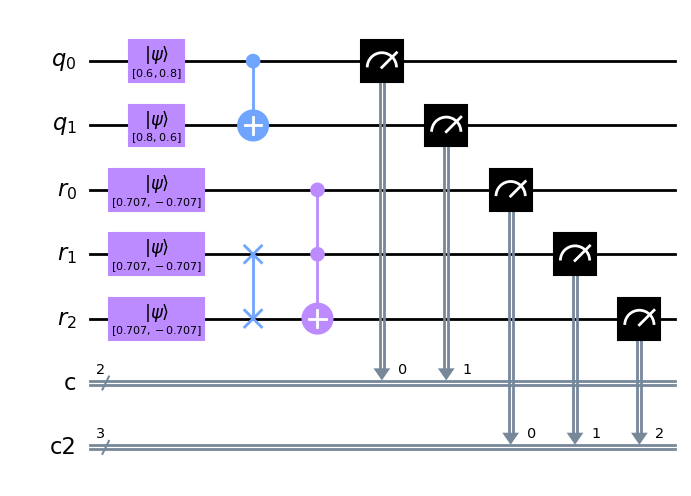

In [388]:
# Insert circuit here
# init regular init
qc.initialize([3/5,4/5], 0)

qc.initialize([4/5,3/5], qreg('q',1))


# init all three 'r' qregs
for i in range(0,3):
    qc.initialize([1/np.sqrt(2), -1/np.sqrt(2)], qreg('r', i))
# use name and id to access quantum register 
qc.cnot(qreg('q', 0),qreg('q', 1))
# direct access quantum registers 
qc.swap(3,4)
# Unpack a block of quantum registers using '*'
qc.ccx(*qregs('r'))

# use direct acces quantum and classical registers in a block
qc.measure([0,1],[0,1])
# use name to get registers
qc.measure(qregs("r"),cregs("c2"))

# Draw it
qc.draw(output="mpl")

In [389]:
from qiskit_aer import AerSimulator

backend = AerSimulator()
job = backend.run(qc, shots=shots, memory=True)


result = job.result()
counts = result.get_counts()

In [390]:
import json
# data formatted into the clasical register blocks  [block1, .., block2] where
# each block contains an array of the results for each shot
mem = result.get_memory()
results = [[] for _ in range(len(crblock))]
for entry in mem:
    for i,x in enumerate(entry.split()):
        results[i].append(x)
mem_file = f"./data/mem-{uniqe_name}.json"
if save_data:
    with open(mem_file,"w+") as f:
        f.write(json.dumps({"mem": mem, "formatted":results}))

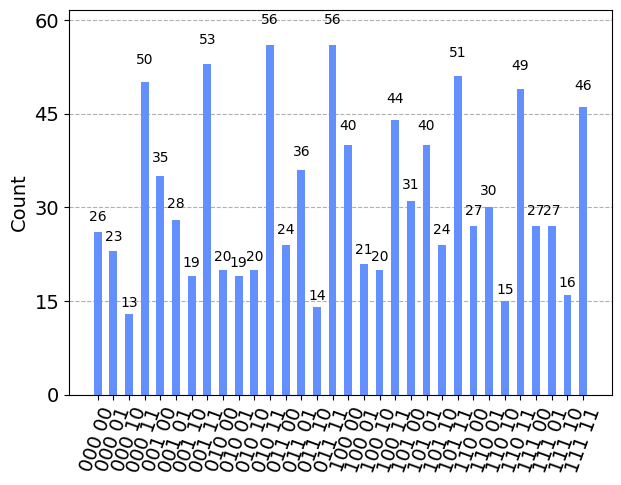

In [391]:
# Use data here
from qiskit.tools.visualization import *
plot_file = f"./data/plot-{uniqe_name}.png"
if save_data:
    plot_histogram(result.get_counts(), filename=plot_file)
plot_histogram(result.get_counts())